In [1]:
import pandas as pd
import numpy as np

# Data load
data = pd.read_csv("data/sp500_2015_2024_clean_tuning.csv",
                   parse_dates=["Date"], index_col="Date")

feature_cols = ["Close","Returns","MA10","MA20","MA50","MA100",
                "Close_lag1","Close_lag5","Volume","Vol20"]
X = data[feature_cols]

# Target = next-day return
y = (data["Close_tomorrow"] / data["Close"]) - 1

# Time-based split 80/20
split_ratio = 0.8
split_index = int(len(data) * split_ratio)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


In [2]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model=Ridge(alpha=1.0)
model.fit(X_train, y_train)

y_pred_ret=model.predict(X_test)

rmse_ret = np.sqrt(mean_squared_error(y_test, y_pred_ret))
print("Ridge RMSE on returns:", rmse_ret)

Ridge RMSE on returns: 0.008212838643838186


C:\Users\Admin\Downloads\AnacondaNavigator\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=5.77783e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


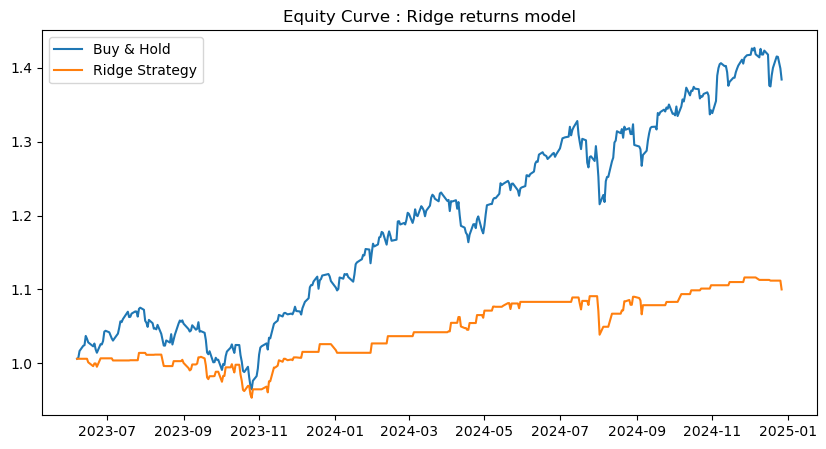

In [3]:
import matplotlib.pyplot as plt

actual_ret=y_test.values
pred_ret=y_pred_ret

signal=np.where(pred_ret>0, 1, 0)

strategy_ret = signal * actual_ret


test_index = y_test.index

equity_buy_hold = pd.Series((1+actual_ret).cumprod(), index = test_index)
equity_strategy = pd.Series((1+strategy_ret).cumprod(), index=test_index)

plt.figure(figsize=(10, 5))
plt.plot(equity_buy_hold.index, equity_buy_hold, label = "Buy & Hold")
plt.plot(equity_strategy.index, equity_strategy, label = "Ridge Strategy")
plt.legend()
plt.title("Equity Curve : Ridge returns model")
plt.show()

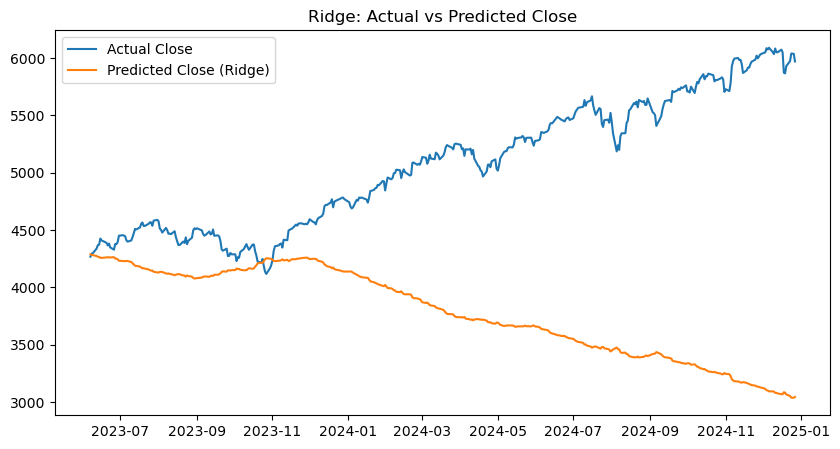

In [4]:
close_test = data["Close"].iloc[split_index:]
pred_close = []

last_close = data["Close"].iloc[split_index-1]

for r in pred_ret:
    c_next = last_close*(1+r)
    pred_close.append(c_next)
    last_close = c_next

pred_close = pd.Series(pred_close, index=close_test.index)

plt.figure(figsize=(10, 5))
plt.plot(close_test.index, close_test.values, label = "Actual Close")
plt.plot(pred_close.index, pred_close.values, label = "Predicted Close (Ridge)")
plt.legend()
plt.title("Ridge: Actual vs Predicted Close")
plt.show()